# Project

In this project, my aim is to building a model for predicting churn. Churn is the percentage of customers that stopped using  company's product or service during a certain time frame. Thus, in the given dataset, my label will be `Churn` column.

## Steps
- Read the `churn.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, do scaling or feature extraction etc.)
- Define appropriate evaluation metric for my case (classification).
- Train and evaluate Logistic Regression, Decision Trees and one other appropriate algorithm which can be chosen from scikit-learn library.
- Is there any overfitting and underfitting? I will Interpret results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric chosen on test dataset.




<h2>Applied Machine Learing Engineer: Oladipo Bolaji John</h2>

# Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
data = pd.read_csv("churn.csv")
data.head()                                       # displays the first 5 rows of the dataset

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
data.tail()                     # displays the last 5 rows of the dataset

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0
3332,0,74,1,1,3.70,0,234.4,113,100.0,13.30,13.7


In [4]:
data.shape                    # for observations and characteristics   

(3333, 11)

In [5]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analys missing values

In [6]:
data.columns                                  # gets the features' names 

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [7]:
data.info()             # columns and corresponding data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [8]:
data.describe()                # returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


# Exploratory Data Analysis

In [9]:
data['Churn'].value_counts(0)                             # label Distribution (count)

0    2850
1     483
Name: Churn, dtype: int64

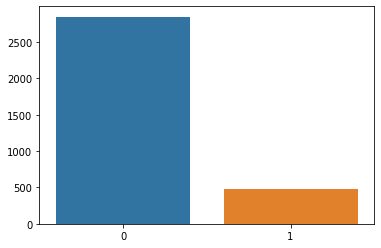

In [10]:
# label Distribution (graph)  

import seaborn as sns
churn_y = [2850,483]
churn_x = ['0', '1']
sns.barplot(x = churn_x, y = churn_y)
plt.show()

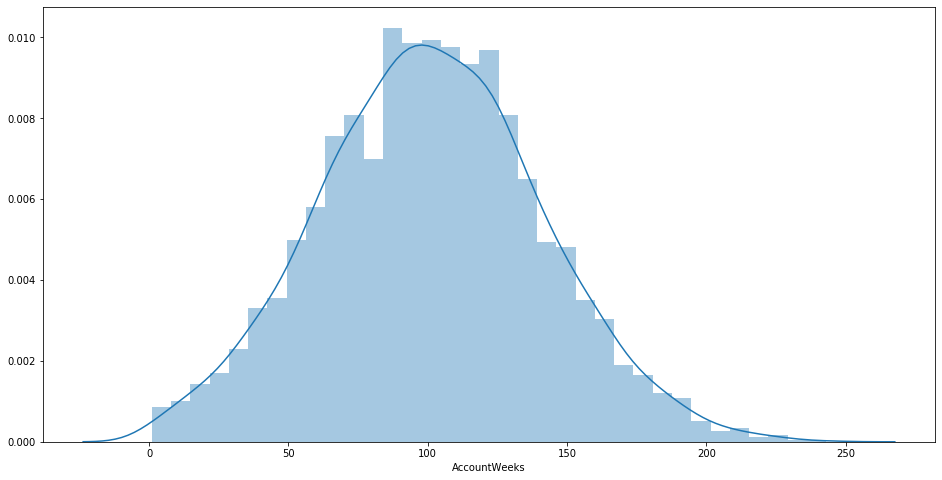

In [11]:
# Example EDA
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(data['AccountWeeks'])                         # checks for the distribution of the data

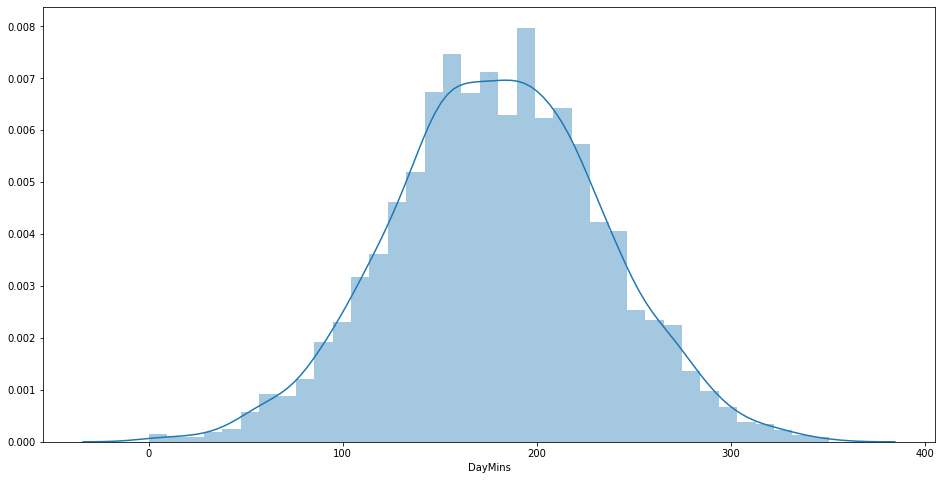

In [12]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(data['DayMins'])                     # checks for the distribution of the data

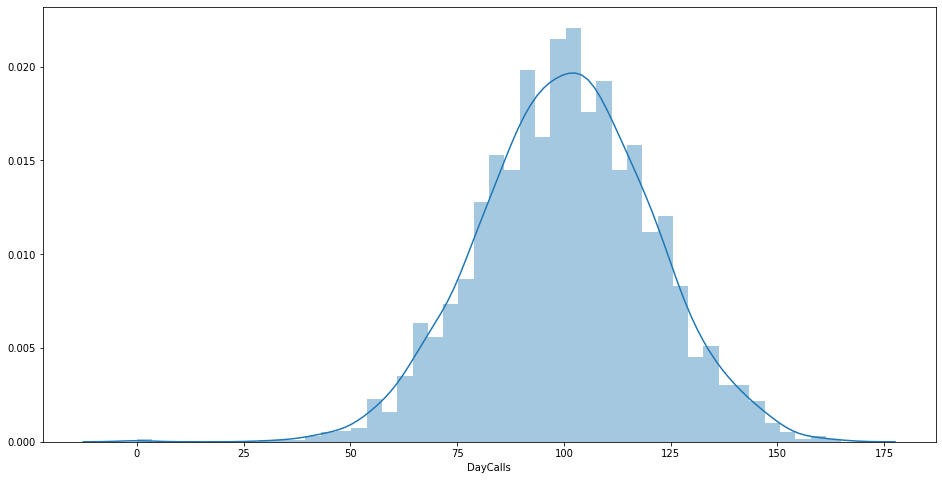

In [13]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(data['DayCalls'])                       # checks for the distribution of the data


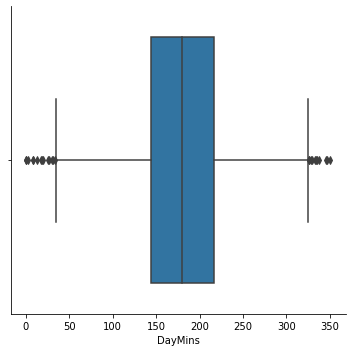

In [14]:
sns.catplot(x='DayMins', kind ='box', data =data)             # displays the outliers

In [15]:
# checksfor features that are correlated with the target.

correlation = data[['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins']].corr()
correlation

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016541,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016541,1.000000,-0.024735,0.002918,0.014391,-0.003796,0.006216,0.038470,0.012581,-0.006749,0.009514
ContractRenewal,-0.259852,-0.024735,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.002918,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.014391,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003796,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.006216,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.038470,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.012581,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006749,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


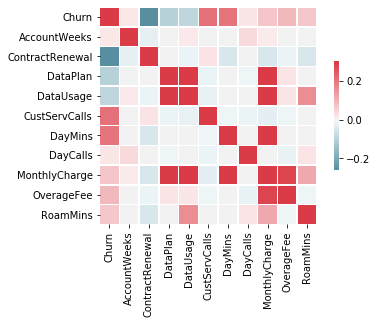

In [16]:
# checksfor features that are correlated with the target.

cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(correlation, vmax=.3, center = 0, square = True, cmap=cmap,linewidth =.5, cbar_kws={"shrink":.5})

In [17]:
# Dropping colerated features
data_df = data.drop(['DataPlan', 'DataUsage',"ContractRenewal"],axis=1)

In [18]:
data_df.isnull().sum()

Churn            0
AccountWeeks     0
CustServCalls    0
DayMins          0
DayCalls         0
MonthlyCharge    0
OverageFee       0
RoamMins         0
dtype: int64

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [19]:
#Identify duplicates records in the data
dupes=data_df.duplicated()
sum(dupes)                            

0

In [20]:
#Removing Duplicates
# data_uniq = data_df.drop_duplicates()

In [21]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data_df))
z

array([[0.41167182, 0.67648946, 0.42793202, ..., 1.99072703, 0.0715836 ,
        0.08500823],
       [0.41167182, 0.14906505, 0.42793202, ..., 1.56451025, 0.10708191,
        1.24048169],
       [0.41167182, 0.9025285 , 1.1882185 , ..., 0.26213309, 1.57434567,
        0.70312091],
       ...,
       [0.41167182, 1.83505538, 0.33235445, ..., 0.01858065, 1.73094204,
        1.3837779 ],
       [0.41167182, 2.08295458, 0.33235445, ..., 0.38390932, 0.81704825,
        1.87621082],
       [0.41167182, 0.67974475, 1.1882185 , ..., 2.66049626, 1.28129669,
        1.24048169]])

In [22]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

96

In [23]:

data_df = data_df.drop(outliers,axis = 0).reset_index(drop = False)
display(data_df)



,index,Churn,AccountWeeks,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,0,128,1,265.1,110,89.0,9.87,10.0
1,1,0,107,1,161.6,123,82.0,9.78,13.7
2,2,0,137,0,243.4,114,52.0,6.06,12.2
3,3,0,84,2,299.4,71,57.0,3.10,6.6
4,4,0,75,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...
3232,3328,0,192,2,156.2,77,71.7,10.78,9.9
3233,3329,0,68,3,231.1,57,56.4,7.67,9.6
3234,3330,0,28,2,180.8,109,56.0,14.44,14.1
3235,3331,0,184,2,213.8,105,50.0,7.98,5.0


In [24]:
features = data_df.select_dtypes(exclude = object).columns.drop(['Churn'])

In [25]:
features 

Index(['index', 'AccountWeeks', 'CustServCalls', 'DayMins', 'DayCalls',
       'MonthlyCharge', 'OverageFee', 'RoamMins'],
      dtype='object')

In [26]:
X = data_df[features]
X = X.drop('index', axis = 1)
y = data_df['Churn']

In [27]:
X

,AccountWeeks,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,265.1,110,89.0,9.87,10.0
1,107,1,161.6,123,82.0,9.78,13.7
2,137,0,243.4,114,52.0,6.06,12.2
3,84,2,299.4,71,57.0,3.10,6.6
4,75,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...
3232,192,2,156.2,77,71.7,10.78,9.9
3233,68,3,231.1,57,56.4,7.67,9.6
3234,28,2,180.8,109,56.0,14.44,14.1
3235,184,2,213.8,105,50.0,7.98,5.0


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 0.68773572, -0.42029732,  1.58302069, ...,  2.02206623,
        -0.07255368, -0.10977508],
       [ 0.15590919, -0.42029732, -0.34534718, ...,  1.58885522,
        -0.10846138,  1.27754701],
       [ 0.91566137, -1.24434483,  1.17871554, ..., -0.26776336,
        -1.59264606,  0.71511914],
       ...,
       [-1.84477155,  0.40375018,  0.01237903, ..., -0.02021422,
         1.75075923,  1.42752778],
       [ 2.10593979,  0.40375018,  0.62722096, ..., -0.39153794,
        -0.82661526, -1.98453466],
       [-0.67981821, -1.24434483,  1.01103138, ...,  2.70282638,
         1.29592844,  1.27754701]])

### Logistic Regression Model ###

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

In [30]:
# Outliers removed & scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)

models_1 = LogisticRegression(random_state=42, n_jobs=-1)
cv_1 = cross_validate(models_1,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv_1['test_score'])))
print("Test accuracy: {}".format(cv_1["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8582781456953642
Test accuracy: 0.8796296296296297


In [31]:
logistic_mean_accuracy =np.mean(cv_1['test_score'])
print(logistic_mean_accuracy)
logistic_MeanTestAccuracy =cv_1["estimator"][0].score(X_test,y_test)
print(logistic_MeanTestAccuracy)

0.8582781456953642
0.8796296296296297


In [32]:
# With outliers & not scaled
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

models_2 = LogisticRegression(random_state=42, n_jobs=-1)
cv_2 = cross_validate(models_2,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv_2['test_score'])))
print("Test accuracy: {}".format(cv_2["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.858719646799117
Test accuracy: 0.8786008230452675


In [33]:
# With outlier but scaling
X_alls = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_alls,y, test_size=0.3, random_state=42)

models_3 = LogisticRegression(random_state=42, n_jobs=-1)
cv_3 = cross_validate(models_3,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv_3['test_score'])))
print("Test accuracy: {}".format(cv_3["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.8582781456953642
Test accuracy: 0.8796296296296297


In [34]:
 cv_1["estimator"][0]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

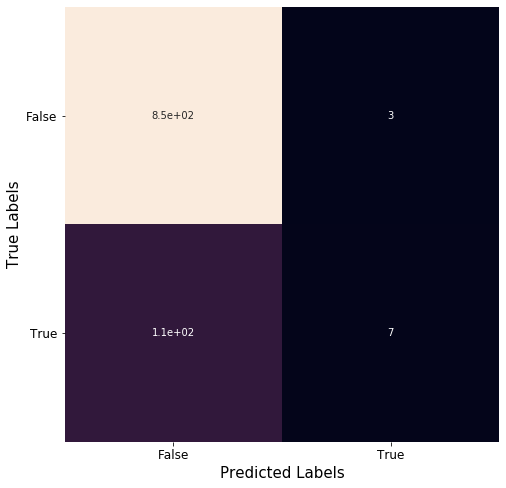

In [35]:
pred = cv_1["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [36]:
print(classification_report(y_test, cv_1["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       851
           1       0.70      0.06      0.11       121

    accuracy                           0.88       972
   macro avg       0.79      0.53      0.52       972
weighted avg       0.86      0.88      0.83       972



In [37]:
final_model = cv_1["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.8796296296296297
Precision: 0.7
Recall: 0.05785123966942149
F1 Score: 0.10687022900763359


In [38]:
precision_score_1 =(precision_score(y_test, pred, average='macro'))
recall_1 = (recall_score(y_test, pred, average='macro'))
accuracy_1 =(accuracy_score(y_test, pred))
f1_score_1 = (f1_score(y_test, pred,average='macro'))

### Decision Tree Model ###

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix

In [40]:
# Outliers removed & scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,  test_size=0.33, random_state=123)

clf_1 = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf_1.fit(X_train,y_train)

print("Accuracy of train:",clf_1.score(X_train,y_train))
print("Accuracy of test:",clf_1.score(X_test,y_test))

Accuracy of train: 0.9211254612546126
Accuracy of test: 0.9158091674462114


In [41]:
DecTree_meanTrainingAccuracy = clf_1.score(X_train,y_train)
print(DecTree_meanTrainingAccuracy)
DecTree_meanTestAccuracy = clf_1.score(X_test,y_test)
print(DecTree_meanTestAccuracy)

0.9211254612546126
0.9158091674462114


In [42]:
# With outliers & not scaled
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.33, random_state=123)

clf_2 = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf_2.fit(X_train,y_train)

print("Accuracy of train:",clf_2.score(X_train,y_train))
print("Accuracy of test:",clf_2.score(X_test,y_test))

Accuracy of train: 0.9211254612546126
Accuracy of test: 0.9158091674462114


In [43]:
# With outlier but scaling
X_alls = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_alls,y,  test_size=0.33, random_state=123)

clf_3 = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf_3.fit(X_train,y_train)

print("Accuracy of train:",clf_3.score(X_train,y_train))
print("Accuracy of test:",clf_3.score(X_test,y_test))

Accuracy of train: 0.9211254612546126
Accuracy of test: 0.9158091674462114


In [44]:
pred = clf_1.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       920
           1       0.80      0.52      0.63       149

    accuracy                           0.92      1069
   macro avg       0.87      0.75      0.79      1069
weighted avg       0.91      0.92      0.91      1069



In [45]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8655392219252471
Recall = 0.7514188794864313
Accuracy = 0.9158091674462114
F1 Score = 0.7932888155520033


In [46]:
precision_score_2 =(precision_score(y_test, pred, average='macro'))
recall_2 = (recall_score(y_test, pred, average='macro'))
accuracy_2 =(accuracy_score(y_test, pred))
f1_score_2 = (f1_score(y_test, pred,average='macro'))

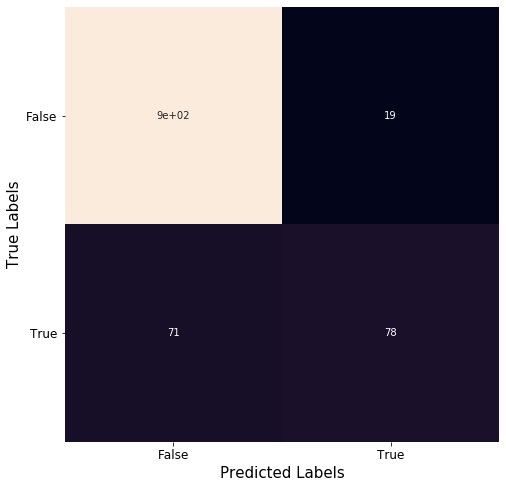

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,  test_size=0.33, random_state=123)

clf_1 = DecisionTreeClassifier(max_depth=4 , random_state=42)
clf_1.fit(X_train,y_train)


pred = clf_1.predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(["False","True"], fontsize = 12)
ax.yaxis.set_ticklabels(["False","True"], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### Linear Regression Model ###

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
# Outliers removed & scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)
modelLR = LinearRegression(normalize=False)
modelLR.fit(X_train,y_train)
print("Score of the train set",modelLR.score(X_train,y_train))
print("Score of the test set",modelLR.score(X_test,y_test))

Score of the train set 0.11081398373217155
Score of the test set 0.08131748469374034


In [50]:
# With outliers & not scaled
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
modelLR_1 = LinearRegression(normalize=False)
modelLR_1.fit(X_train,y_train)
print("Score of the train set",modelLR_1.score(X_train,y_train))
print("Score of the test set",modelLR_1.score(X_test,y_test))

Score of the train set 0.11081398373217155
Score of the test set 0.08131748469374045


In [51]:
# With outlier but scaling
X_alls = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_alls,y, test_size=0.3, random_state=42)

modelLR_2 = LinearRegression(normalize=False)
modelLR_2.fit(X_train,y_train)
print("Score of the train set",modelLR_2.score(X_train,y_train))
print("Score of the test set",modelLR_2.score(X_test,y_test))

Score of the train set 0.11081398373217155
Score of the test set 0.08131748469374034


### CatBoost Model ###

In [52]:
!pip install catboost==0.24.1

In [53]:
from catboost import CatBoostClassifier
from sklearn.model_selection import (cross_val_score,StratifiedKFold)

In [54]:
# Outliers removed & scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.3, random_state=42)

catB_Model = CatBoostClassifier()
catB_Model.fit(X_train,y_train)

print("Score of the train set",catB_Model.score(X_train,y_train))
print("Score of the test set",catB_Model.score(X_test,y_test))

Learning rate set to 0.014607
0:	learn: 0.6787342	total: 153ms	remaining: 2m 32s
1:	learn: 0.6652281	total: 162ms	remaining: 1m 20s
2:	learn: 0.6514700	total: 172ms	remaining: 57s
3:	learn: 0.6381740	total: 181ms	remaining: 44.9s
4:	learn: 0.6256699	total: 187ms	remaining: 37.2s
5:	learn: 0.6130873	total: 194ms	remaining: 32.2s
6:	learn: 0.6024551	total: 201ms	remaining: 28.6s
7:	learn: 0.5937078	total: 205ms	remaining: 25.4s
8:	learn: 0.5846570	total: 209ms	remaining: 23s
9:	learn: 0.5743056	total: 212ms	remaining: 20.9s
10:	learn: 0.5641186	total: 215ms	remaining: 19.3s
11:	learn: 0.5534298	total: 218ms	remaining: 18s
12:	learn: 0.5437931	total: 221ms	remaining: 16.8s
13:	learn: 0.5352330	total: 225ms	remaining: 15.8s
14:	learn: 0.5261446	total: 227ms	remaining: 14.9s
15:	learn: 0.5182236	total: 231ms	remaining: 14.2s
16:	learn: 0.5090502	total: 235ms	remaining: 13.6s
17:	learn: 0.5009231	total: 238ms	remaining: 13s
18:	learn: 0.4932929	total: 242ms	remaining: 12.5s
19:	learn: 0.4874

In [56]:
# with outliers & not scaling
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

catB_Model_2= CatBoostClassifier()
catB_Model_2.fit(X_train,y_train)

print("Score of the train set",catB_Model_2.score(X_train,y_train))
print("Score of the test set",catB_Model_2.score(X_test,y_test))

Learning rate set to 0.014607
0:	learn: 0.6787342	total: 5.6ms	remaining: 5.59s
1:	learn: 0.6652281	total: 9.12ms	remaining: 4.55s
2:	learn: 0.6514700	total: 12.6ms	remaining: 4.18s
3:	learn: 0.6381740	total: 16.1ms	remaining: 4.01s
4:	learn: 0.6256699	total: 19.4ms	remaining: 3.86s
5:	learn: 0.6130873	total: 22.7ms	remaining: 3.76s
6:	learn: 0.6024551	total: 26ms	remaining: 3.69s
7:	learn: 0.5937078	total: 29.5ms	remaining: 3.66s
8:	learn: 0.5846570	total: 33ms	remaining: 3.63s
9:	learn: 0.5743056	total: 36ms	remaining: 3.56s
10:	learn: 0.5641186	total: 39.5ms	remaining: 3.55s
11:	learn: 0.5534298	total: 42.9ms	remaining: 3.53s
12:	learn: 0.5437931	total: 47.7ms	remaining: 3.62s
13:	learn: 0.5352330	total: 53.7ms	remaining: 3.78s
14:	learn: 0.5261446	total: 58ms	remaining: 3.81s
15:	learn: 0.5182236	total: 61.9ms	remaining: 3.81s
16:	learn: 0.5090502	total: 66.3ms	remaining: 3.83s
17:	learn: 0.5009231	total: 70ms	remaining: 3.82s
18:	learn: 0.4932929	total: 73.1ms	remaining: 3.77s
19:

In [60]:
catB_meanTrainingAccuracy = catB_Model_2.score(X_train,y_train)
print(catB_meanTrainingAccuracy)
catB_meanTestAccuracy = catB_Model_2.score(X_test,y_test)
print(catB_meanTestAccuracy)

0.9558498896247241
0.9320987654320988


In [61]:
# With outlier but scaling
X_alls = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_alls,y, test_size=0.3, random_state=42)

catB_Model_2 = CatBoostClassifier()
catB_Model_2.fit(X_train,y_train)

print("Score of the train set",catB_Model_2.score(X_train,y_train))
print("Score of the test set",catB_Model_2.score(X_test,y_test))

Learning rate set to 0.014607
0:	learn: 0.6787342	total: 4.61ms	remaining: 4.61s
1:	learn: 0.6652281	total: 8.31ms	remaining: 4.15s
2:	learn: 0.6514700	total: 11.8ms	remaining: 3.91s
3:	learn: 0.6381740	total: 15.2ms	remaining: 3.79s
4:	learn: 0.6256699	total: 18.5ms	remaining: 3.68s
5:	learn: 0.6130873	total: 21.6ms	remaining: 3.58s
6:	learn: 0.6024551	total: 25.1ms	remaining: 3.56s
7:	learn: 0.5937078	total: 28.7ms	remaining: 3.56s
8:	learn: 0.5846570	total: 32.1ms	remaining: 3.54s
9:	learn: 0.5743056	total: 36ms	remaining: 3.56s
10:	learn: 0.5641186	total: 42.9ms	remaining: 3.86s
11:	learn: 0.5534298	total: 49.9ms	remaining: 4.11s
12:	learn: 0.5437931	total: 55.9ms	remaining: 4.25s
13:	learn: 0.5352330	total: 60.2ms	remaining: 4.24s
14:	learn: 0.5261446	total: 77ms	remaining: 5.06s
15:	learn: 0.5182236	total: 82.9ms	remaining: 5.1s
16:	learn: 0.5090502	total: 86.6ms	remaining: 5.01s
17:	learn: 0.5009231	total: 90.3ms	remaining: 4.93s
18:	learn: 0.4932929	total: 94.1ms	remaining: 4.8

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

catB_Model_1= CatBoostClassifier()
catB_Model_1.fit(X_train,y_train)

pred = catB_Model_1.predict(X_test)
print(classification_report(y_test,pred))

Learning rate set to 0.014607
0:	learn: 0.6787342	total: 5.01ms	remaining: 5s
1:	learn: 0.6652281	total: 8.99ms	remaining: 4.49s
2:	learn: 0.6514700	total: 13.1ms	remaining: 4.35s
3:	learn: 0.6381740	total: 17ms	remaining: 4.23s
4:	learn: 0.6256699	total: 20.3ms	remaining: 4.04s
5:	learn: 0.6130873	total: 24.1ms	remaining: 4s
6:	learn: 0.6024551	total: 28.2ms	remaining: 4s
7:	learn: 0.5937078	total: 31.9ms	remaining: 3.95s
8:	learn: 0.5846570	total: 35.9ms	remaining: 3.95s
9:	learn: 0.5743056	total: 39.4ms	remaining: 3.9s
10:	learn: 0.5641186	total: 47.9ms	remaining: 4.31s
11:	learn: 0.5534298	total: 55.6ms	remaining: 4.58s
12:	learn: 0.5437931	total: 60.6ms	remaining: 4.6s
13:	learn: 0.5352330	total: 64.8ms	remaining: 4.56s
14:	learn: 0.5261446	total: 70.1ms	remaining: 4.6s
15:	learn: 0.5182236	total: 73.6ms	remaining: 4.53s
16:	learn: 0.5090502	total: 77.3ms	remaining: 4.47s
17:	learn: 0.5009231	total: 81.2ms	remaining: 4.43s
18:	learn: 0.4932929	total: 84.7ms	remaining: 4.37s
19:	le

In [64]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.8738571303838046
Recall = 0.7910770993774947
Accuracy = 0.9320987654320988
F1 Score = 0.8252865048585996


In [65]:
precision_score_3 =(precision_score(y_test, pred, average='macro'))
recall_3 = (recall_score(y_test, pred, average='macro'))
accuracy_3 =(accuracy_score(y_test, pred))
f1_score_3 = (f1_score(y_test, pred,average='macro'))

### Choosing The Best Algorithm ###

In [66]:
print(f"cat Boost Mean Training Accuracy is  : {catB_meanTrainingAccuracy: .2%}")
print(f"cat Boost Mean Test Accuracy is      : {catB_meanTestAccuracy: .2%}")

print(f"Decision Tree  Training Accuracy is  : {DecTree_meanTrainingAccuracy: .2%}")
print(f"Decision Tree Test Accuracy is       : {DecTree_meanTestAccuracy: .2%}")

print(f"Logistic  Training Accuracy is       : {logistic_mean_accuracy: .2%}")
print(f"Logistic Test Accuracy is            : {logistic_MeanTestAccuracy: .2%}")

cat Boost Mean Training Accuracy is  :  95.58%
cat Boost Mean Test Accuracy is      :  93.21%
Decision Tree  Training Accuracy is  :  92.11%
Decision Tree Test Accuracy is       :  91.58%
Logistic  Training Accuracy is       :  85.83%
Logistic Test Accuracy is            :  87.96%


In [67]:
print(f"cat Boost Precision Score is : {precision_score_3: .2%}")
print(f"cat Boost Recall Score is    : {recall_3: .2%}")
print(f"cat Boost Accuracy Score is  : {accuracy_3: .2%}")
print(f"cat Boost F1 Score is        : {f1_score_3: .2%}")

print(f"Decision Precision Score is  : {precision_score_2: .2%}")
print(f"Decision Recall Score is     : {recall_2: .2%}")
print(f"Decision Accuracy Score is   : {accuracy_2: .2%}")
print(f"Decision F1 Score is         : {f1_score_2: .2%}")

print(f"Logistic Precision Score is  : {precision_score_1: .2%}")
print(f"Logistic Test Accuracy is    : {recall_1: .2%}")
print(f"Logistic Accuracy Score is   : {accuracy_1: .2%}")
print(f"Logistic F1 Score is         : {f1_score_1: .2%}")



cat Boost Precision Score is :  87.39%
cat Boost Recall Score is    :  79.11%
cat Boost Accuracy Score is  :  93.21%
cat Boost F1 Score is        :  82.53%
Decision Precision Score is  :  86.55%
Decision Recall Score is     :  75.14%
Decision Accuracy Score is   :  91.58%
Decision F1 Score is         :  79.33%
Logistic Precision Score is  :  79.07%
Logistic Test Accuracy is    :  52.72%
Logistic Accuracy Score is   :  87.96%
Logistic F1 Score is         :  52.12%


***The choice of the Algorithm model to be used is Cat Boost***.





***Because it has high:***

#### Mean Traing Score ####

#### Mean Testing Score ####

#### Precision Score ####
 For example,Precision is a good measure to determine, when the costs of False Positive is high. For instance, Number of people that Churn. In a Business setting, a false positive means that an person that will churn(actual negative) has been identified as churn (predicted defaulter). The Business might lose money if the precision is not high for the Churn model.
#### Recall Score ####

#### Accuracy Score  ####
